## Bài 3:
* Hiểu code phần thực hành cho linear regression. 
* Vẽ thêm biểu đồ cho loss function theo epoch. 
* Thay đổi các giá trị learning_rate khác nhau xem đồ thị loss trông thế nào.

### 3.1 Tự code lại theo cách hiểu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("data_linear.csv")
data.head(10)

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


<AxesSubplot:xlabel='Diện tích', ylabel='Giá'>

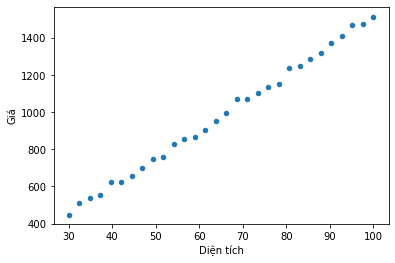

In [20]:
data.plot.scatter(x = "Diện tích", y = "Giá")

In [102]:
# Start lấy dữ liệu
data = pd.read_csv("data_linear.csv").values
x = data[:, 0].reshape(-1, 1)

# Ma trận output thực
y = data[:, 1].reshape(-1, 1)

# Số samples, số columns
N, d = data.shape

# Biến đổi ma trận input x
X = np.hstack((np.ones((N, 1)), x))

In [103]:
# Tạo ma trận w
w = np.array([0., 1.]).reshape(-1, 1)
print(w)

[[0.]
 [1.]]


In [104]:
# Traning - Gradient descent
numOfIteration = 100
loss = np.zeros((numOfIteration, 1))
lr = 0.000001

for i in range(0, numOfIteration):
    r = np.dot(X, w) - y # y hat - y
    loss[i] = 0.5*np.sum(r*r)/N
    # update w
    w = w - lr * np.dot(X.T, r)
#     print("step {}, loss: {}".format(i, loss[i]))
    


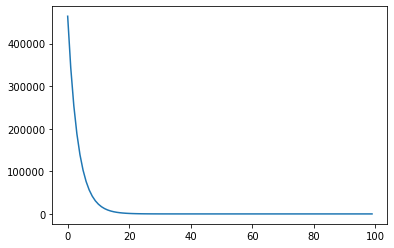

In [105]:
# Đồ thị giữa loss và số vòng lặp (số #epoch)
# Thể hiện lr: very high, high, low or good
plt.plot(loss)

In [106]:
# Sau khi traing
print(w)

[[ 0.19471286]
 [15.10986529]]


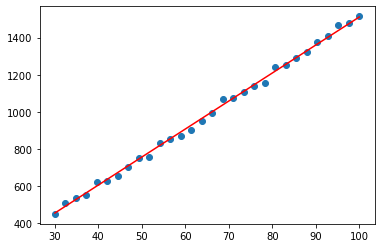

In [107]:
# Vẽ hàm dự đoán: y^ = w0 + w1*x
predict = np.dot(X, w)
# Vẽ đường thẳng khi biết 2 điểm
plt.plot((X[0][1], X[N-1][1]),(predict[0], predict[N-1]), color="red")
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1) 
plt.scatter(x, y)


In [109]:
# Predict after training
x1 = 50
y1 = w[0] + w[1] * 50
print('Giá nhà cho 50m^2 là : ', y1)

Giá nhà cho 50m^2 là :  [755.68797748]


### 3.2. Thay đổi lr

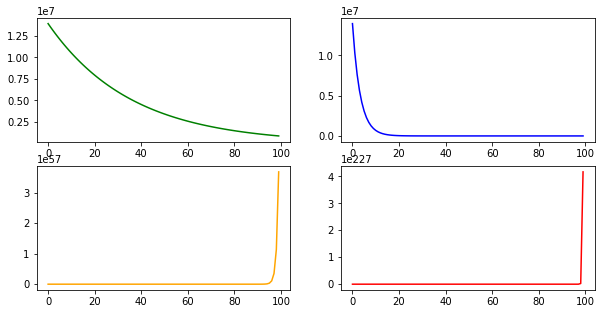

In [155]:
data = pd.read_csv('data_linear.csv').values

#N: số điểm dữ liệu, x cột 
N = data.shape[0]
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

#thêm cột 1 vào x
x = np.hstack((np.ones((N, 1)), x))

#tham số để training
numOfIteration = 100
cost = [[],[],[],[]]

# 4 learning_rate
learning_rate = [0.0000001,0.000001,0.00002,0.0001]

#training
for i in range(len(learning_rate)):
    cost[i] = np.zeros((numOfIteration,1))
    w = np.array([0.,1.]).reshape(-1,1)
    for j in range(numOfIteration):
        r = np.dot(x, w) - y
        cost[i][j] = 0.5*np.sum(r*r)
        # correct the shape dimension
        w = w - learning_rate[i] * np.dot(x.T, r)
        #print('lr {}, step {}, cost: {}'.format(i, j, cost[i][j]))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
ax1.plot(cost[0], color="green", label="lr nhỏ");
ax2.plot(cost[1], color="blue", label="lr vừa");
ax3.plot(cost[2], color="orange", label="lr lớn");
ax4.plot(cost[3], color="red", label="lr rất lớn");